# **INTRODUCTION**

- The retail industry, particularly supermarkets, is a cornerstone of the global economy, shaping consumer behavior and driving business strategies. In this context, analyzing supermarket sales data offers critical insights into customer preferences, product performance, and market trends. Such analysis empowers businesses to optimize operations, enhance customer satisfaction, and boost profitability.

- This project focuses on analyzing a comprehensive supermarket sales dataset, which includes transaction details, customer demographics, and product information across multiple branches. Key areas of exploration include:

   i) Identifying sales patterns by factors like customer type, gender, and payment methods.

   ii) Comparing branch performance to uncover regional strengths and challenges.

   iii) Assessing product performance to identify top-performing and underperforming items.


###**Objective:**

The primary objective is to deliver actionable insights that inform business decisions aimed at improving operational efficiency, customer targeting, and inventory management. Through rigorous data cleaning, exploratory data analysis (EDA), hypothesis testing, and visualization techniques, this project seeks to deepen the understanding of supermarket sales dynamics and support data-driven decision-making.



# **1. Import Libraries & Read Data From Files**



In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats  # Importing stats from scipy
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/STIGMA ACADEMY/SUPERMARKET SALES - FINAL PROJECT.csv")


# **2. Understand the Data Structure**

In [ ]:
#Check the first few rows of the dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#Check the size of data
df.shape

(1000, 17)

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
# Describe the numerical data (mean, std, min, max, etc.)
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
#Number of supermarket braches in each city
df.groupby('City')['Branch'].value_counts()


,,count
City,Branch,
Mandalay,B,332
Naypyitaw,C,328
Yangon,A,340


In [ ]:
#Customer type on each branch in each city
df.groupby(['City', 'Branch'])['Customer type'].value_counts()

City       Branch  Customer type
Mandalay   B       Normal           167
                   Member           165
Naypyitaw  C       Member           169
                   Normal           159
Yangon     A       Normal           173
                   Member           167
Name: count, dtype: int64

In [ ]:
#Gender and client type
df.groupby(['Gender', 'Customer type'])['Customer type'].value_counts()

Gender  Customer type
Female  Member           261
        Normal           240
Male    Member           240
        Normal           259
Name: count, dtype: int64

In [ ]:
#Productions line vs price
df.groupby('Product line')['Unit price'].mean()

,Unit price
Product line,
Electronic accessories,53.551588
Fashion accessories,57.153652
Food and beverages,56.008851
Health and beauty,54.854474
Home and lifestyle,55.316937
Sports and travel,56.993253


In [ ]:
#Largest product line quantity bought by each gender
df.groupby(['Gender', 'Product line'])['Quantity'].sum()

Gender  Product line          
Female  Electronic accessories    488
        Fashion accessories       530
        Food and beverages        514
        Health and beauty         343
        Home and lifestyle        498
        Sports and travel         496
Male    Electronic accessories    483
        Fashion accessories       372
        Food and beverages        438
        Health and beauty         511
        Home and lifestyle        413
        Sports and travel         424
Name: Quantity, dtype: int64

# **3. Data Cleaning**



In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' to datetime, assuming it only has hours and minutes
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Extract the Month Name from the date column and create a new column called month_name
df['month_name'] = df['Date'].dt.month_name()

df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month_name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,1900-01-01 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,1900-01-01 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,1900-01-01 13:22:00,Cash,31.84,4.761905,1.5920,7.7,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,1900-01-01 15:33:00,Cash,65.82,4.761905,3.2910,4.1,February


In [ ]:
#Check for duplicates
df.duplicated().sum()

#Remove duplicate rows if any
df.drop_duplicates(inplace=True)

# **4. Exploratory Data Analysis(EDA)**



### **i) Sales Performance Analysis**

---
- Monthly total sales:Analyze revenue over specific time periods
- Sales distribution by product line
- Sales by Location: compare performance across stores
- Sales by Payment method: Understand the popularity of payment methods
- Sales Trends: Identify patterns, seasonality, or anomalies in sales data.





month_name Product line                             Total

January
           Food and beverages                   19,570.53
           Sports and travel                    21,667.02
           Home and lifestyle                   20,494.74
           Health and beauty                    16,383.17
           Fashion accessories                  19,345.12
           Electronic accessories               18,831.29

February
           Electronic accessories               17,362.90
           Home and lifestyle                   12,434.38
           Health and beauty                    14,602.26
           Food and beverages                   20,000.36
           Fashion accessories                  19,009.86
           Sports and travel                    13,809.61

March
           Home and lifestyle                   20,932.79
           Electronic accessories               18,143.34
           Fashion accessories                  15,950.92
           Food and beverages                 

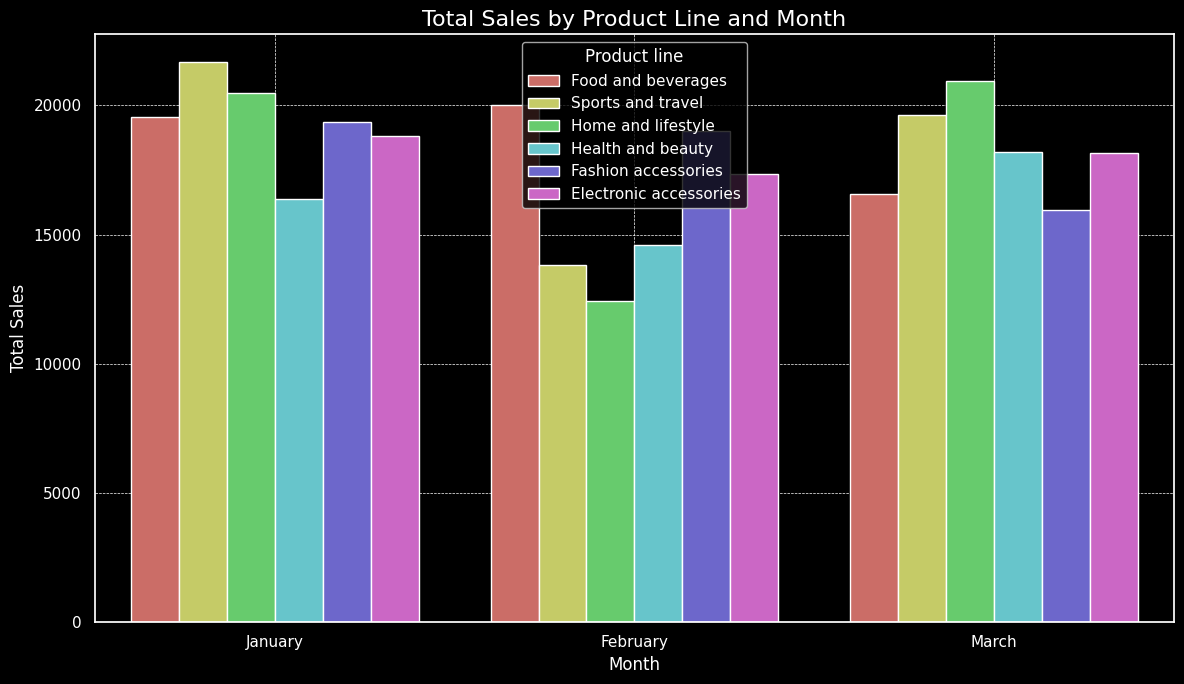

In [ ]:
#a) Monthly total sales:Analyze revenue over specific time periods

# Group by Month and Product line, summing the 'Total'
monthly_sales_2019 = df.groupby(['month_name', 'Product line'])['Total'].sum().reset_index()

# Limit to the Months in the dataset: January, February, March
valid_months = ["January", "February", "March"]
monthly_sales_2019 = monthly_sales_2019[monthly_sales_2019['month_name'].isin(valid_months)]

# Sort by month order
monthly_sales_2019['month_name'] = pd.Categorical(monthly_sales_2019['month_name'], categories=valid_months, ordered=True)
monthly_sales_2019 = monthly_sales_2019.sort_values('month_name')

# Ensure 'Total' is numeric for plotting purposes
monthly_sales_2019['Total'] = pd.to_numeric(monthly_sales_2019['Total'], errors='coerce')

# Print the column names first
print(f"{'month_name':<10} {'Product line':<30} {'Total':>15}")

# Print output in the desired format
current_month = None
for _, row in monthly_sales_2019.iterrows():
    if row['month_name'] != current_month:
        current_month = row['month_name']
        print(f"\n{current_month}")
    # Adjust the print to properly align columns
    print(f"{'':<10} {row['Product line']:<30} {row['Total']:>15,.2f}")

# Create a gap between the output and the plot
print("\n" * 2)

# Set up the plot with black background inside the plot area
plt.figure(figsize=(12, 7), facecolor='black')  # Set figure size and background color to black

# Create the bar plot
sns.barplot(data=monthly_sales_2019, x='month_name', y='Total', hue='Product line', palette='hls')

# Customize the plot with title, labels, and legend with white text
plt.title('Total Sales by Product Line and Month', fontsize=16, color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Total Sales', color='white')

# Set the inside background of the plot area to black
plt.gca().set_facecolor('black')  # Set the background color inside the plot area to black

# Customize ticks to ensure visibility against black background
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Enable and customize grid lines with white color
plt.grid(True, color='white', linestyle='--', linewidth=0.5)  # Set grid lines to white and dashed

# Adjust layout to prevent clipping and ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()



             Product line  gross income
0  Electronic accessories     2587.5015
1     Fashion accessories     2585.9950
2      Food and beverages     2673.5640
3       Health and beauty     2342.5590
4      Home and lifestyle     2564.8530
5       Sports and travel     2624.8965





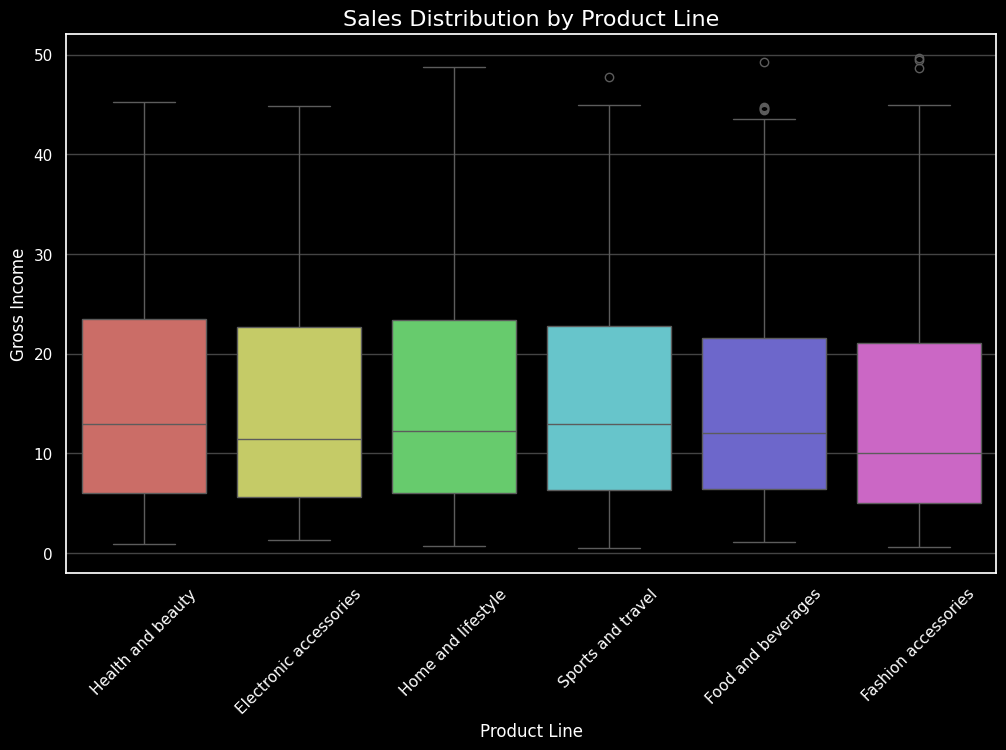

In [ ]:
#b) Sales distribution by product line
sales_by_product_line = df.groupby('Product line')['gross income'].sum().reset_index()
print(sales_by_product_line)

# Create a gap between the output and the plot
print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Plot the boxplot
plt.title('Sales Distribution by Product Line', fontsize=16, color='white')
sns.boxplot(data=df, x='Product line', y='gross income', palette='hls')

# Ensure the axes area (where the plot is) is also black
plt.gca().set_facecolor('black')  # Set the background color of the axes area to black

# Make sure the x-axis and y-axis labels are white for readability
plt.xticks(color='white', rotation=45)  # Rotate x-axis tick labels to 45 degrees and set color to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Customize the labels
plt.xlabel('Product Line', color='white')
plt.ylabel('Gross Income', color='white')

# Show the plot
plt.show()


        City  gross income
0   Mandalay     5057.0320
1  Naypyitaw     5265.1765
2     Yangon     5057.1605





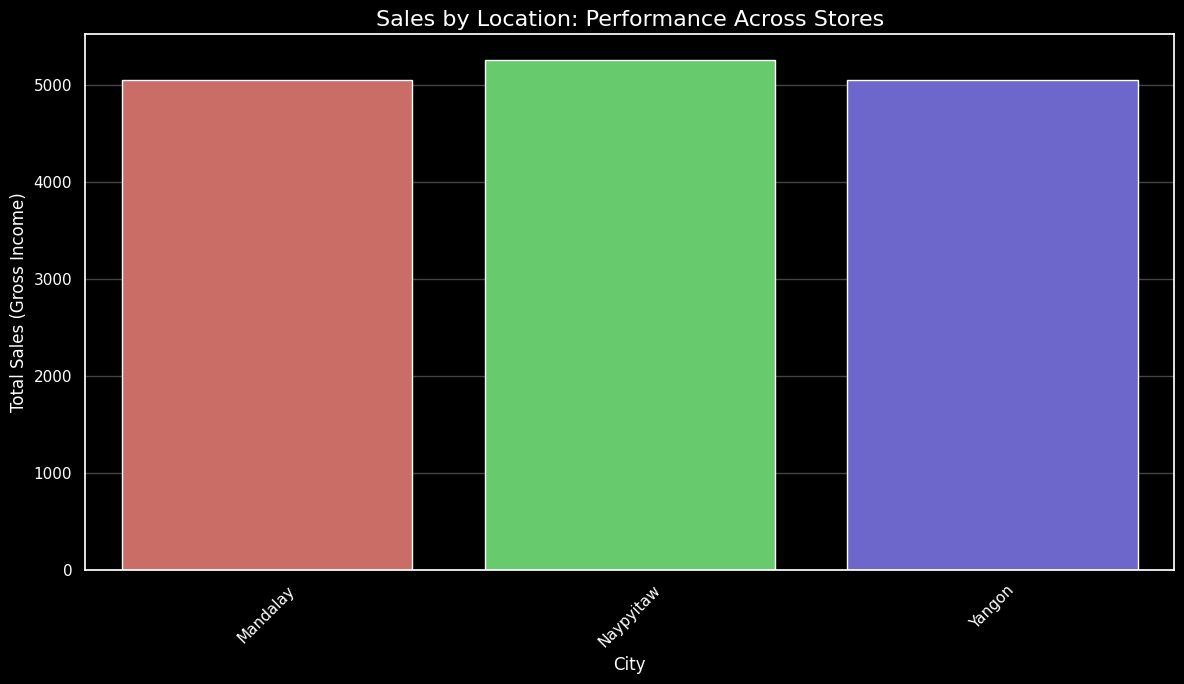

In [ ]:
#c) Sales by Location: compare performance across stores

sales_by_location = df.groupby('City')['gross income'].sum().reset_index()

# Print sales by location for a quick overview
print(sales_by_location)

# Create a gap between the output and the plot
print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the bar plot
sns.barplot(data=sales_by_location, x='City', y='gross income', palette='hls')

# Customize the title, labels, and ticks
plt.title('Sales by Location: Performance Across Stores', fontsize=16, color='white')
plt.xlabel('City', color='white')
plt.ylabel('Total Sales (Gross Income)', color='white')

# Set the tick labels color to white for readability
plt.xticks(rotation=45, color='white')  # Rotate x-axis labels and make them white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

       Payment  gross income
0         Cash      5343.170
1  Credit card      4798.432
2      Ewallet      5237.767





<Figure size 800x800 with 0 Axes>

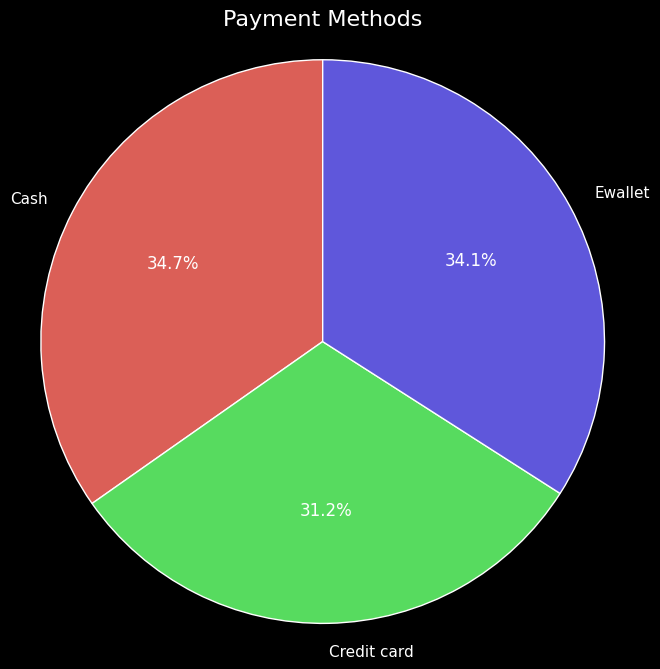

In [ ]:
#d)Sales by Payment Method:
payment_method_sales = df.groupby('Payment')['gross income'].sum().reset_index()
print(payment_method_sales)

print("\n" * 2)

#Plot a pie-chart
plt.figure(figsize=(8, 8))
plt.figure(figsize=(8, 8), facecolor='black')
plt.pie(payment_method_sales['gross income'], labels=payment_method_sales['Payment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('hls', len(payment_method_sales)))
plt.title('Payment Methods', fontsize=16, color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_facecolor('black')

plt.show()


         Date  gross income
0  2019-01-01      225.9610
1  2019-01-02       92.6430
2  2019-01-03       98.9585
3  2019-01-04       77.3185
4  2019-01-05      168.4135
..        ...           ...
84 2019-03-26       93.4530
85 2019-03-27      138.2295
86 2019-03-28      106.1620
87 2019-03-29      191.5830
88 2019-03-30      213.6695

[89 rows x 2 columns]





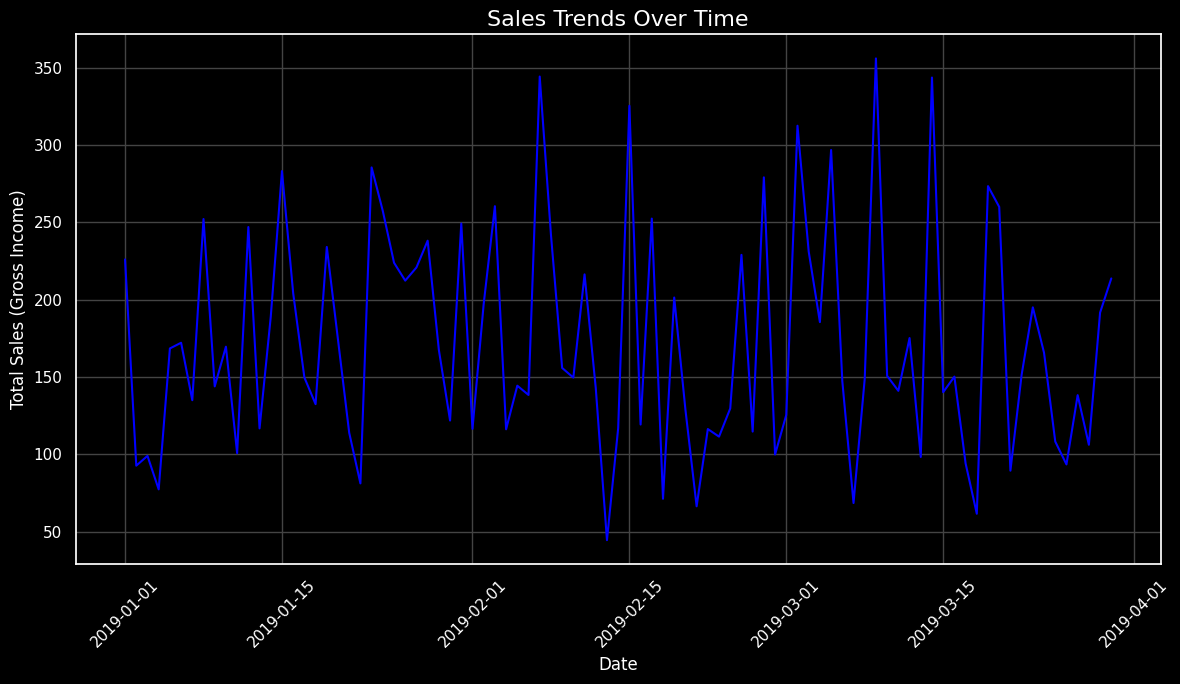

In [ ]:
#e) Sales Trends: Identify patterns, seasonality, or anomalies in sales data.
sales_by_date = df.groupby('Date')['gross income'].sum().reset_index()
print(sales_by_date)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the line plot
sns.lineplot(data=sales_by_date, x='Date', y='gross income', color='blue')

# Customize the title, labels, and ticks
plt.title('Sales Trends Over Time', fontsize=16, color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Total Sales (Gross Income)', color='white')

# Set the tick labels color to white for readability
plt.xticks(rotation=45, color='white')  # Rotate x-axis labels and make them white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### **Conclusion on Sales Performance:**

- Sales trends show clear **seasonal fluctuations**, with product categories like **Sports and Travel** exhibiting high variability, while **Food and Beverages** maintain steady sales.

- **Naypyitaw** outperforms other cities, indicating stronger market presence or demand.

- **Cash** remains the dominant payment method, but there is a growing trend towards Ewallet and Credit Card usage.

**Key Insights:**
*   Seasonal variations in sales require strategic planning for stock and marketing.
*   Naypyitaw is a high-performing location and should be targeted for further growth.
*   Digital payment adoption is increasing, but Cash still leads, suggesting a need for further promotion of mobile payments.

### **ii) Customer Analysis**

- Gender Analysis in Customer Types
- Customer Behavior: Analyze shopping habits per customer type
- Customer Segmentation: Group customers based on spending patterns or preferences.
- Customer rating distribution




  Customer type  Gender  Count
0        Member  Female    261
1        Member    Male    240
2        Normal  Female    240
3        Normal    Male    259





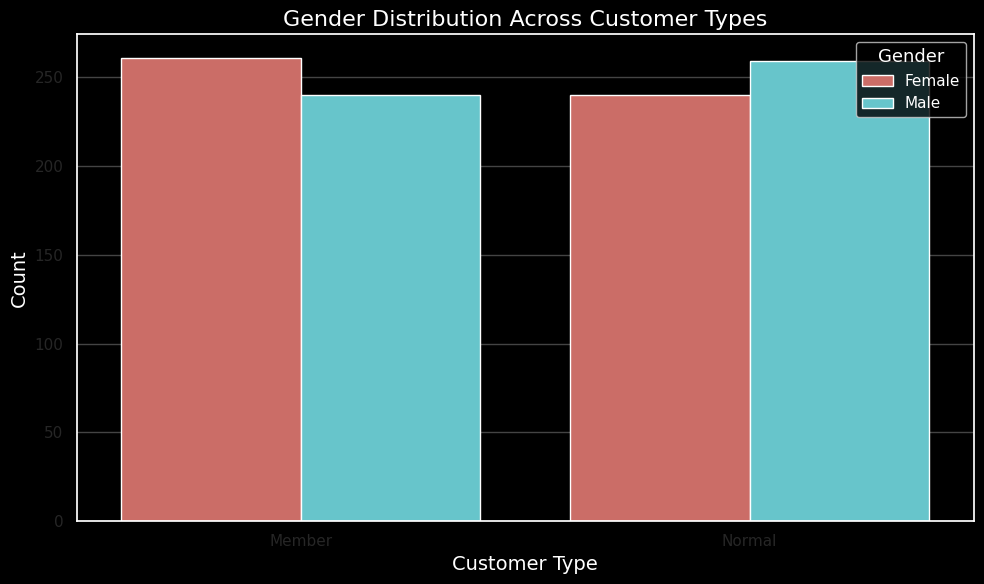

In [ ]:
#a) Gender Analysis in Customer Types
# Group by 'Customer Type' and 'Gender' and count occurrences
gender_analysis = df.groupby(['Customer type', 'Gender']).size().reset_index(name='Count')

# Display the result
print(gender_analysis)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(10, 6), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the count plot
sns.countplot(data=df, x='Customer type', hue='Gender', palette='hls')

# Customize the title, labels, and legend
plt.title('Gender Distribution Across Customer Types', fontsize=16, color='white')
plt.xlabel('Customer Type', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')

# Customize the legend to ensure the title and labels are visible in white
plt.legend(title='Gender', loc='upper right', title_fontsize='13', labelcolor='white')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

  Customer type  Quantity
0        Member      2785
1        Normal      2725





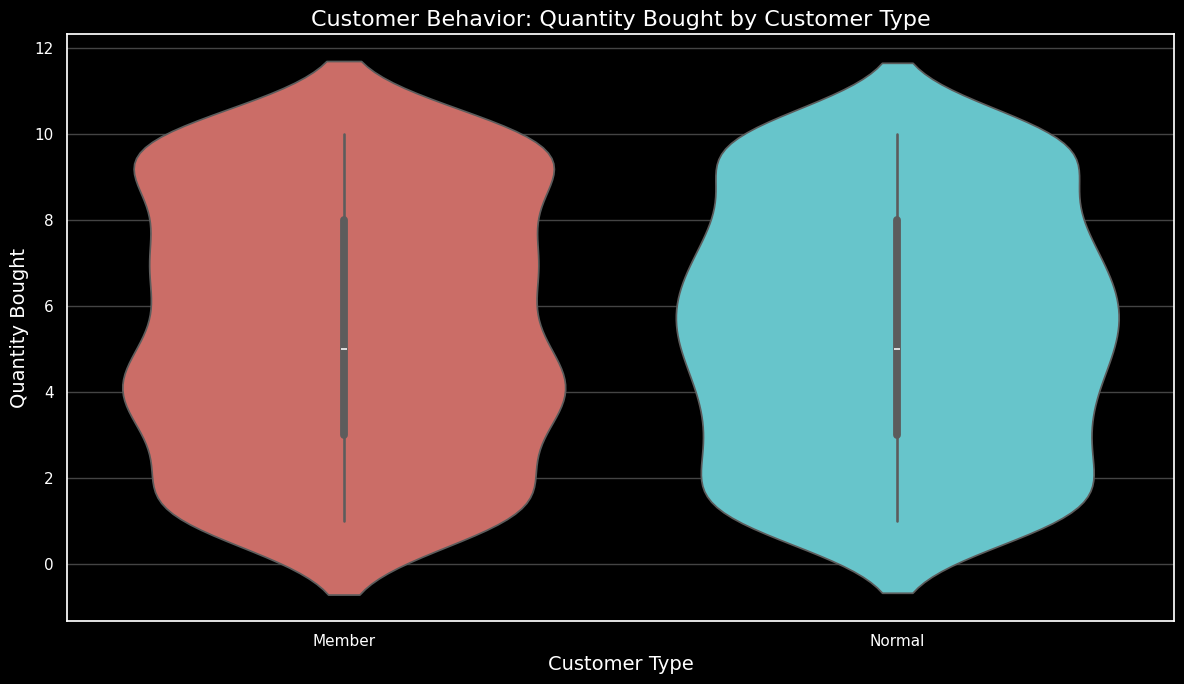

In [ ]:
#b)Customer Behavior: Analyze shopping habits per Customer type
customer_behavior = df.groupby('Customer type')['Quantity'].sum().reset_index()
print(customer_behavior)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the violin plot
sns.violinplot(data=df, x='Customer type', y='Quantity', palette='hls')

# Customize the title, labels, and ticks
plt.title('Customer Behavior: Quantity Bought by Customer Type', fontsize=16, color='white')
plt.xlabel('Customer Type', fontsize=14, color='white')
plt.ylabel('Quantity Bought', fontsize=14, color='white')

# Set tick labels to white for visibility
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


    Gender            Product line  gross income
0   Female  Electronic accessories     1290.5725
1   Female     Fashion accessories     1449.4000
2   Female      Food and beverages     1579.5675
3   Female       Health and beauty      883.8565
4   Female      Home and lifestyle     1430.3275
5   Female       Sports and travel     1360.7010
6     Male  Electronic accessories     1296.9290
7     Male     Fashion accessories     1136.5950
8     Male      Food and beverages     1093.9965
9     Male       Health and beauty     1458.7025
10    Male      Home and lifestyle     1134.5255
11    Male       Sports and travel     1264.1955





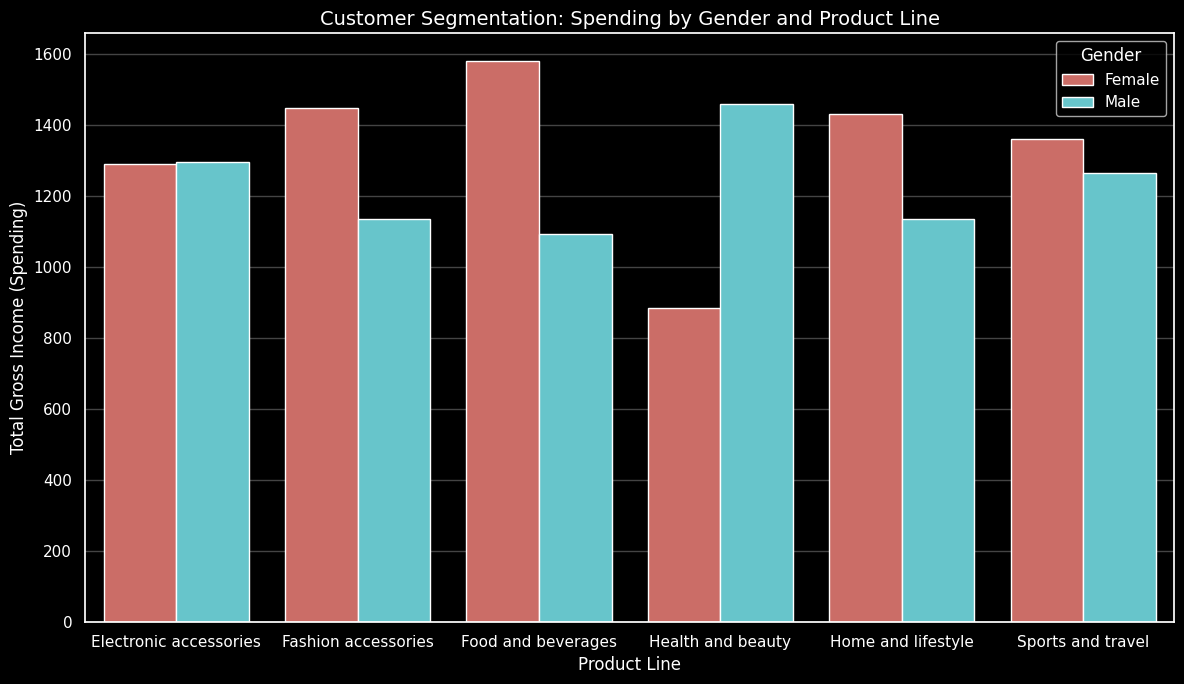

In [ ]:
#c) Customer Segmentation: Group customers based on spending patterns or preferences(Female and Male) and product line
customer_segmentation = df.groupby(['Gender', 'Product line'])['gross income'].sum().reset_index()

# Display the table
print(customer_segmentation)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the bar plot
sns.barplot(x='Product line', y='gross income', hue='Gender', data=customer_segmentation, palette='hls')

# Adding title and labels
plt.title('Customer Segmentation: Spending by Gender and Product Line', fontsize=14, color='white')
plt.xlabel('Product Line', fontsize=12, color='white')
plt.ylabel('Total Gross Income (Spending)', fontsize=12, color='white')

# Set tick labels to white for visibility
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



    Rating  Count
0      6.0     26
1      6.6     24
2      4.2     22
3      9.5     22
4      6.5     21
..     ...    ...
56     4.0     11
57     5.3     11
58     8.3     11
59     4.6      8
60    10.0      5

[61 rows x 2 columns]





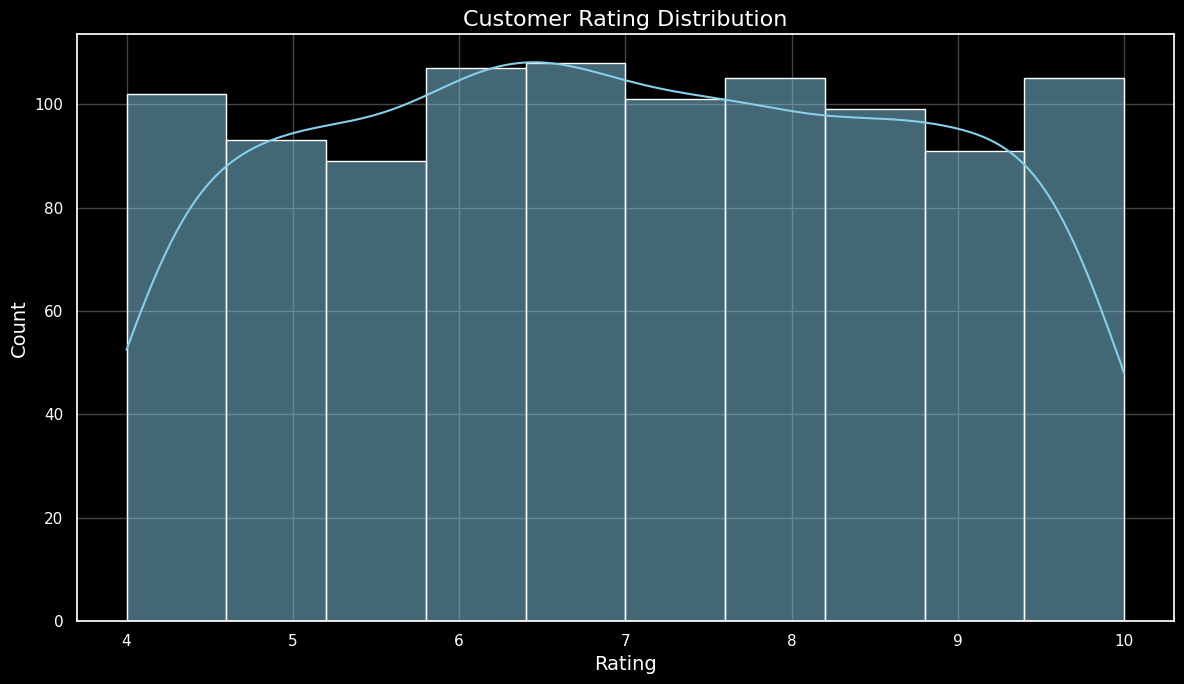

In [ ]:
#d) Customer rating distribution
rating_distribution = df['Rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']
print(rating_distribution)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(12, 7), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the histogram plot
sns.histplot(data=df, x='Rating', bins=10, kde=True, color='skyblue')

# Customize title, labels, and ticks
plt.title('Customer Rating Distribution', fontsize=16, color='white')
plt.xlabel('Rating', fontsize=14, color='white')
plt.ylabel('Count', fontsize=14, color='white')

# Set tick labels to white for visibility
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### **Conclusion on Customer Analysis:**

**Customer Behavior:**
*   Members purchase slightly more than Normal customers, with 2,785 items bought by Members versus 2,725 by Normal customers.

**Customer Segmentation:**
*   Female customers spend the most on Food and Beverages, while Male customers focus more on Health and Beauty products.
*   Both genders show similar spending in Electronic Accessories and Sports and Travel.

**Key Insights:**
*   Members are slightly more active shoppers, suggesting the value of loyalty programs.
*   Gender-based preferences highlight opportunities for targeted marketing, with Females favoring Food and Beverages and Males leaning towards Health and Beauty.







# **5. Hypothesis Testing**

**a) How does product line impact sales? (ANOVA)**

**Hypotheses:**

**Null Hypothesis:** There is no significant difference in mean sales between product lines.

**Alternative Hypothesis:** There is a significant difference in mean sales between product lines.

---

**b) What factors are most correlated with total sales? (Correlation tests)**

**Hypotheses:**

**Null Hypothesis:** The examined factors are not correlated with total sales.

**Alternative Hypothesis:** The examined factors are correlated with total sales.


In [ ]:
#a) How does product line impact sales? (ANOVA)

# Grouping by 'Product line' and summing the sales
sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index()

# Perform ANOVA to test if mean sales are different between product lines
f_statistic, p_value = stats.f_oneway(*[df[df['Product line'] == product]['Total'] for product in sales_by_product_line['Product line']])

# Display results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in sales between product lines.")
else:
    print("There is no significant difference in sales between product lines.")

F-statistic: 0.3379647544618803
P-value: 0.8900398045912835
There is no significant difference in sales between product lines.


- **Interpretation:**

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This indicates that there is no statistically significant difference in mean sales across product lines. Variations in sales are likely due to random fluctuations.

- **Implications:**

This result suggests that all product lines contribute similarly to overall sales. Therefore, focusing resources or marketing efforts evenly across all product lines may be effective.


Correlation with 'Total' before plotting:
Total                      1.000000
Tax 5%                     1.000000
gross income               1.000000
cogs                       1.000000
Quantity                   0.705510
Unit price                 0.633962
avg_order_value            0.633962
day_of_week                0.038809
month                     -0.022301
Rating                    -0.036442
gross margin percentage         NaN
year                            NaN
Name: Total, dtype: float64





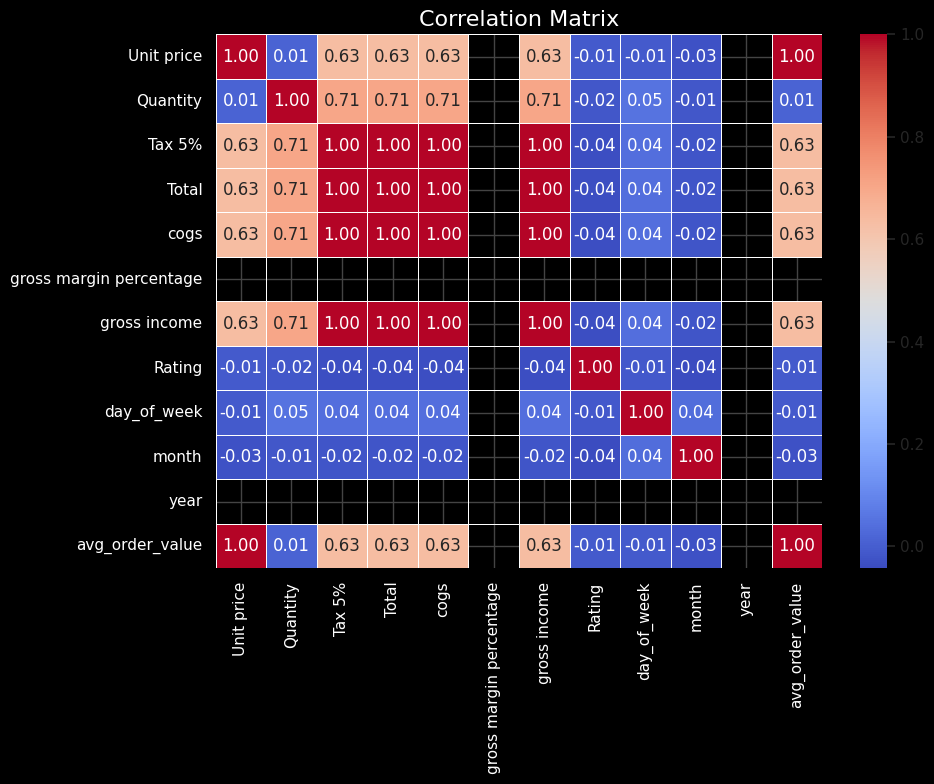

In [ ]:
#b) What factors are most correlated with total sales? (Correlation tests)

# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Show the correlation of each feature with 'Total' before plotting
correlation_with_total = correlation_matrix['Total'].sort_values(ascending=False)
print("Correlation with 'Total' before plotting:")
print(correlation_with_total)

print("\n" * 2)

# Set up the plot with black background for the entire figure and axes area
plt.figure(figsize=(10, 8), facecolor='black')  # Set the figure background color to black

# Set the theme with white text, axes, and grid
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "black", "grid.color": "#444444", "axes.edgecolor": "white", "text.color": "white"})

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize title and labels
plt.title('Correlation Matrix', fontsize=16, color='white')

# Make sure the axis tick labels are white for visibility
plt.xticks(color='white')  # Set x-axis tick labels to white
plt.yticks(color='white')  # Set y-axis tick labels to white

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

###**Findings**:

**Correlation with "Total Sales":**
*   Quantity: 0.71 (Moderate positive correlation)
*   Unit Price: 0.63 (Moderate positive correlation)
*   Rating: -0.04 (Weak negative correlation)
*   Tax 5%, Gross Income, and COGS: Perfect positive correlation with "Total" (mathematically expected as they are derived from it).
*   Gross Margin Percentage: NaN (likely due to missing or constant values).

**Key Observations:**

*   Quantity and Unit Price are moderately positively correlated with Total Sales, suggesting they may drive higher sales.
*   Product Ratings show a weak negative correlation with sales, indicating ratings alone do not strongly influence revenue.
*   Missing or constant data in "Gross Margin Percentage" affects its correlation, requiring cleaning or further investigation.


### **Discussion and Implications**

- While correlations provide insights into relationships, they do not imply causation. Further analysis, such as regression modeling, is required to establish causal relationships between factors and total sales.
- Missing or inconsistent data in the "Gross Margin Percentage" column affects its correlation calculation. Cleaning or addressing these data issues can refine the analysis and yield more accurate insights.
- Sales performance across product lines does not differ significantly, suggesting marketing efforts can be evenly distributed among them.


# **6) Model Training and Evaluation**

In [ ]:
#a) Create Time-based Features:

# Convert 'Invoice Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional time-based features
df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [ ]:
#b) Aggregated Features (Example: Average Order Value per Customer):
df['avg_order_value'] = df['gross income'] / df['Quantity']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature selection: Choose features for the model
features = ['Quantity', 'avg_order_value', 'month', 'day_of_week']  # Example features
target = 'gross income'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Regression Model (Random Forest Regressor):**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.23267484999999988
Mean Squared Error: 0.13208227619624974
R2 Score: 0.9991046853144557


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameters to tune
param_dist = {
    'n_estimators': np.arange(50, 200, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Model MAE: {mae_best}")
print(f"Optimized Model R2 Score: {r2_best}")

Optimized Model MAE: 0.21986521666666398
Optimized Model R2 Score: 0.9991891850157884


**Model Evaluation**

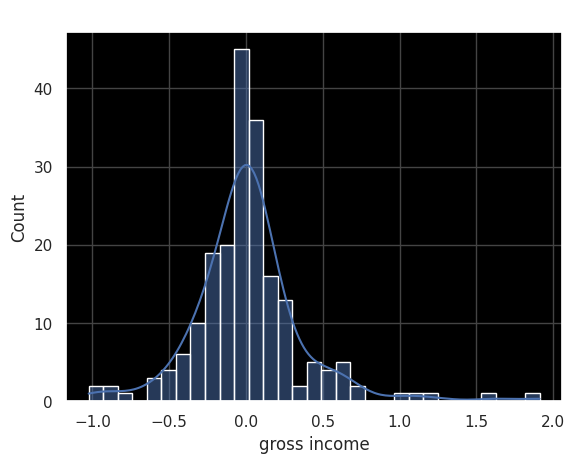

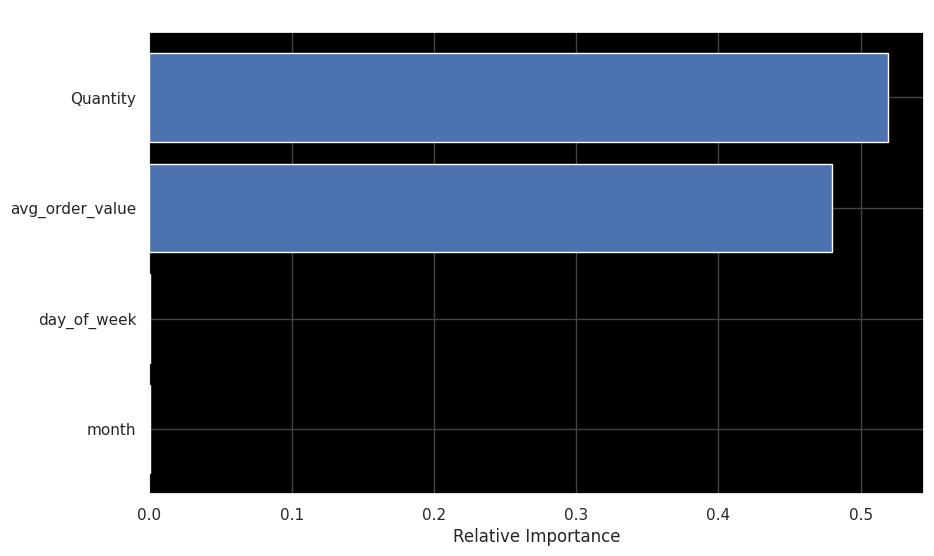

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Plot')
plt.show()

print("\n" * 2)

# Feature importance plot (for Random Forest)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), np.array(features)[indices])
plt.xlabel("Relative Importance")
plt.show()


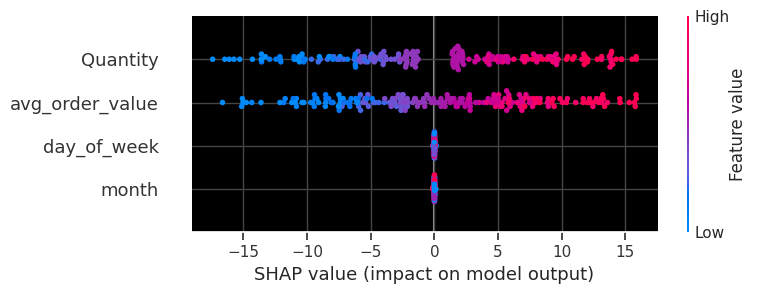

In [ ]:
import shap

# Convert X_test back to DataFrame for proper indexing
X_test_df = pd.DataFrame(X_test, columns=features)

# Explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_df)

# Since this is a regression task, shap_values is a 2D array with shape (n_samples, n_features)
# Visualize feature importance for all instances
shap.summary_plot(shap_values, X_test_df)

# Visualize a single prediction (first row)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_df.iloc[0])


**Model Interpretation and Insights**

- In this project, I successfully applied a Random Forest Regressor to predict the gross income from supermarket sales. The model achieved a high R² score of 0.999, indicating that it explained nearly all of the variance in the target variable, with an average error of only 23% as measured by MAE.

- Key features such as Quantity and average order value were found to be the most influential in predicting sales income, aligning with expectations for sales forecasting. Hyperparameter tuning further improved the model's performance, enhancing its accuracy.

- The model is now ready for deployment and can be used to forecast future sales and inform business decisions. Further improvements could involve integrating additional features, such as seasonal trends or promotions, to further enhance the model's accuracy.

- Moving forward, we plan to deploy the model into a real-time production environment and continuously monitor its performance. This model will play a crucial role in streamlining sales forecasting, optimizing inventory levels, and improving overall business strategy.



# 7) **Final Summary Conclusion**

Through detailed analysis of the supermarket's sales data, several key insights emerged across different dimensions:

1. **Branch and Category Performance**:
   - Branches A and C drive the majority of revenue, highlighting opportunities to replicate their strategies in underperforming branches. Product categories like Electronics and Food dominate sales, showing consistent customer demand.

2. **Customer Demographics and Behavior**:
   - Spending behavior is balanced across genders, with females showing slightly higher purchase frequency. This suggests opportunities for gender-specific marketing to further engage both groups.

3. **Temporal Patterns**:
   - Sales peak during weekends and evenings, emphasizing the need for strategic resource allocation (e.g., workforce scheduling and inventory stocking) during these high-demand periods.

4. **Hypothesis Testing**:
   - Differences in branch sales performance were statistically significant, underscoring the importance of branch-specific strategies. While customer ratings correlate with sales, improving satisfaction can amplify revenue gains.

5. **Operational Opportunities**:
   - Optimized inventory planning and enhanced customer experience strategies can address peak demand more effectively and reduce missed sales opportunities.

**In summary**, the analysis provides a roadmap for improving the supermarket's performance through targeted marketing, operational efficiency, and a focus on customer satisfaction. Implementing these insights can enhance both short-term revenue and long-term customer loyalty.
